<a href="https://colab.research.google.com/github/ChrisDaVillager/sales-predictions/blob/main/Project_1_Part_4_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# importing necessary libraries for data viz

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np

In [4]:
filename = '/content/drive/MyDrive/Stack 1/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# **Project 1 - Part 2**

**1. How many rows and columns?**

In [5]:
# 8523 rows 12 columns

df.shape

(8523, 12)

**2. What are the datatypes of each variable?**

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**3. Are there duplicates? If so, drop any duplicates.**

In [7]:
df.duplicated().sum()

0

**4. Identify missing values**

In [8]:
# identify missing values and align in descending to read easier

df.isna().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice)**

In [9]:
# figure out the sum of the total items and fill in 
# will fill in average weight of items for 'Item_Weight'
# missing values are 17% of the total values
# replacing with average shouldn't hurt since this is based on sales
# item weight for sales shouldn't account for anything relevant

df['Item_Weight'].mean().round(2)

12.86

In [10]:
# set filter for avg of weight
# fill missing values with avg

avg_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(avg_weight, inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# size of outlet seems irrelevant
# any missing values inside of outlet_size can be filled in with
# values from previous rows

df.ffill(inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**6. Confirm that there are no missing values after addressing them.**

In [12]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)**

In [13]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [14]:
# identified inconsistent values in the fat content

df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
# replace LF & low fat with Low Fat

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat'],'Low Fat')

In [16]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [17]:
# replace reg with Regular

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'],'Regular')

In [18]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**8. For any numerical columns, obtain the summary statistics of each (min, max, mean)**

In [19]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [21]:
df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']].describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


#**Project 1 - Part 3**

**Histogram to view the distributions of various features in your dataset.** 

In [22]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Text(0, 0.5, 'Number of Items')

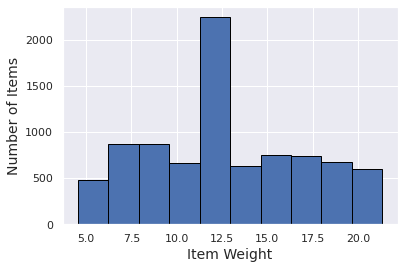

In [23]:
# providing histogram data viz on item weight using matplotlib
# provide additional elements to make viz more presentable
# citing: https://www.statology.org/change-font-size-matplotlib/ for 'size' element to increase font size

sns.set(style = 'darkgrid')

plt.hist(df['Item_Weight'], edgecolor = 'black')
plt.xlabel('Item Weight', size = 14)
plt.ylabel('Number of Items', size = 14)

This histogram shows the minimum and maximum weight of the provided items in the dataset. More items have a weight between ~11-12 lbs. 

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000.]), <a list of 9 Text major ticklabel objects>)

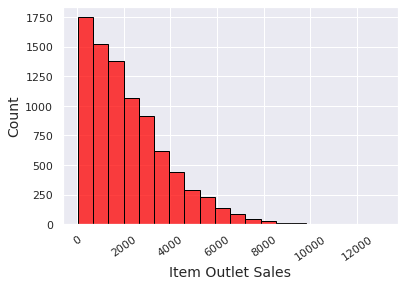

In [24]:
# histogram data viz on outlet sales using seaborn
# decreased the amount of bins to make histogram easier to see instead of having to squint
# added a bit of style to this histogram

sns.set(style = 'darkgrid')

sns.histplot(data=df, x = 'Item_Outlet_Sales', color ='red', edgecolor = 'black', bins = 20)
plt.ylabel('Count', size=14)
plt.xlabel('Item Outlet Sales', size=14)
plt.xticks(rotation = 35)

The above histogram displays the amount/value of sales per item. Majority of items were sold cheaper, yet these items could be a higher demand item. 

**Boxplot to view statistical summaries of various features in your dataset.**

Text(0.5, 0, 'Item Fat Content')

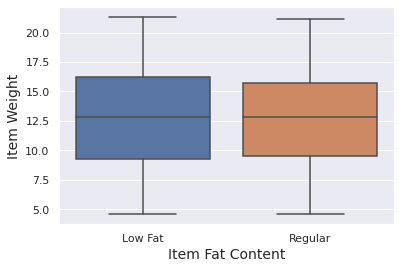

In [25]:
# creating boxplot data viz for item fat content by item weight

sns.boxplot(x='Item_Fat_Content', y='Item_Weight', data=df)
plt.ylabel('Item Weight', size=14)
plt.xlabel('Item Fat Content', size=14)

The above boxplot displays the distribution of the items weight, based on the item fat content. Low Fat and Regular have very slight differences

**Heatmap of the correlation between features.**

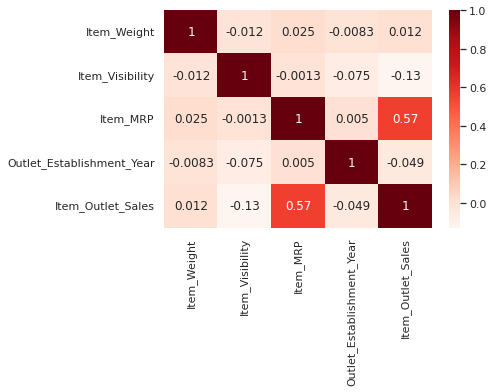

In [26]:
# creating correlation heatmap for all provided data

corr = df.corr()
sns.heatmap(corr, cmap = 'Reds', annot = True)

The above heatmap shows the correlation between all the provided data and their counterparts. There is a moderate correlation between Item MRP and Item Outlet Sales.

# **Project 1 - Part 4**
* Build on your previous cleaning, exploration, and analysis
* Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis)
*Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [29]:
# changing column names to remove underscores

df = df.rename(columns = {'Item_Identifier':'Item Identifier','Item_Weight':'Item Weight','Item_Fat_Content':'Item Fat Content','Item_Visibility':'Item Visibility',
                          'Item_Type':'Item Type','Item_MRP':'Item MRP','Outlet_Identifier':'Outlet Identifier','Outlet_Establishment_Year':'Outlet Establishment Year',
                          'Outlet_Size':'Outlet Size','Outlet_Location_Type':'Outlet Location Type','Outlet_Type':'Outlet Type','Item_Outlet_Sales':'Item Outlet Sales'})
df.head()

,Item Identifier,Item Weight,Item Fat Content,Item Visibility,Item Type,Item MRP,Outlet Identifier,Outlet Establishment Year,Outlet Size,Outlet Location Type,Outlet Type,Item Outlet Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Data Visualization 1**

In [30]:
def tens(x,pos):
    return f'{x*1e-0:.0f}'

def plot_info(data,x='Item Weight',figsize=(12,6),format_weight=True):
    fig, ax = plt.subplots(figsize=figsize)

    sns.histplot(data=df,x=x,ax=ax, color='r', edgecolor='k')
    ax.set_title('Item Weight Distribution',
                 fontsize=18,
                 fontweight='bold');

    mean_weight = df[x].mean()
    ax.axvline(mean_weight,color='blue',ls='--',lw=3,
               label=f'Average Item Weight= {mean_weight:,.0f}lbs',);

    ax.set_xlabel(ax.xaxis.get_label().get_text(),
                  fontsize='x-large')
    plt.ylabel('Count',fontsize='x-large')

    ax.legend();

    if format_weight:

       weight_fmt = FuncFormatter(tens)
       ax.xaxis.set_major_formatter(weight_fmt)

    return fig,ax

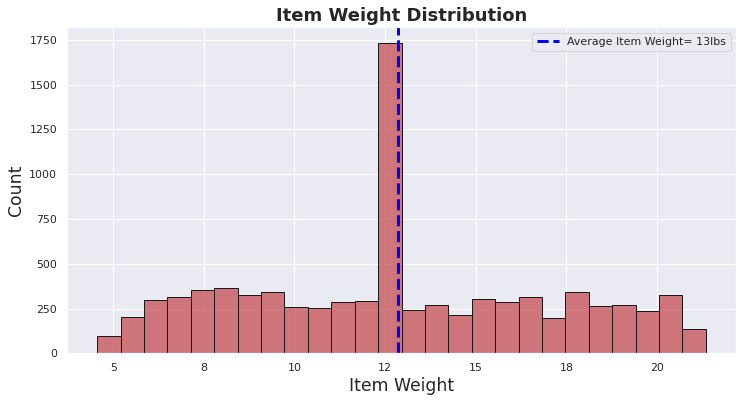

In [31]:
plot_info(df);

**Data Visualization 2**

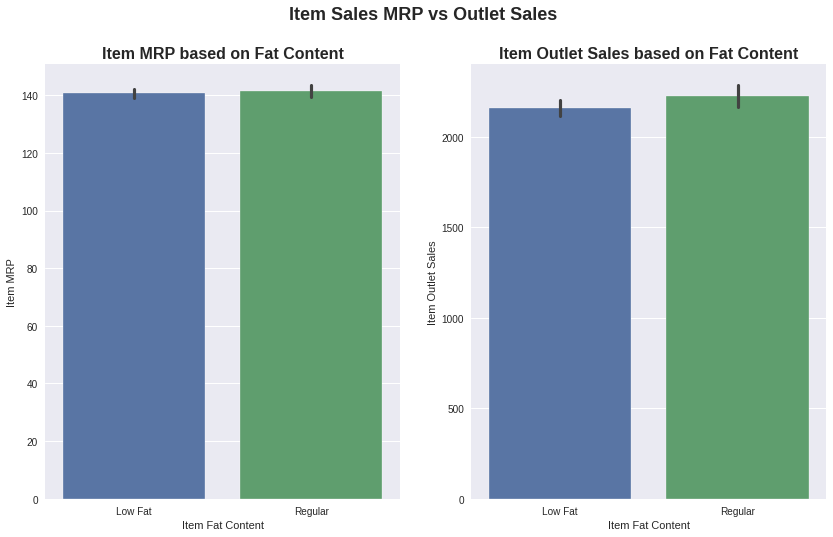

In [50]:
fig, axes = plt.subplots(ncols=2, figsize=(14,8))

sns.barplot(data=df, x='Item Fat Content', y='Item MRP', ax=axes[0])
axes[0].set_title('Item MRP based on Fat Content', fontsize=16, fontweight='semibold')

sns.barplot(data=df, x='Item Fat Content', y='Item Outlet Sales', ax=axes[1])
axes[1].set_title('Item Outlet Sales based on Fat Content', fontsize=16, fontweight='semibold')

fig.suptitle('Item Sales MRP vs Outlet Sales', fontsize=18, fontweight='bold');